In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.models import load_model
model=load_model('/content/gdrive/My Drive/Last Dataset/log/goodResNet50.h5')
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 400, 400, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 400, 400, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 400, 400, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 200, 200, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 200, 200, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 200, 200, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 100, 100, 128)     0   

In [ ]:
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from keras.preprocessing.image import load_img,img_to_array
import os, cv2
from keras.applications.vgg16 import preprocess_input
l=[]

In [ ]:
filenames = os.listdir("../content/gdrive/My Drive/Last Dataset/test")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'safe':
        categories.append(0)
    else:
        categories.append(1)

test_all_df = pd.DataFrame({
    'filename': filenames,
    'category': categories})

In [ ]:

test_labels=test_all_df.category
test_labels

0      0
1      1
2      0
3      0
4      0
      ..
268    0
269    0
270    0
271    0
272    0
Name: category, Length: 273, dtype: int64

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_all_df, 
    "../content/gdrive/My Drive/Last Dataset/test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(400,400),
    shuffle=False)

Found 273 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator)
rounded_predictions=np.argmax(predict,axis=-1)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
# i='/content/gdrive/MyDrive/Last Dataset/test/'+example_df.filename[0]
# print(i)
# showx=cv2.imread(i)
# x=img_to_array(showx)
# x=cv2.resize(x,(400,400))
# x=np.expand_dims(x,axis=0)
# p=model.predict(x,batch_size=None)
# print(p[0][0])

In [ ]:
# image12 = load_img(i, target_size=(224,224))
# image12 = img_to_array(image12)
# image12 = np.expand_dims(image12, axis=0)

# image = preprocess_input(image12)
# predictions = model.predict(image12)

# print(predictions)

###Confusion Matrix

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [ ]:
print(cm)

[[162  17]
 [ 19  75]]


In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['safe','unsafe']

Confusion matrix, without normalization
[[162  17]
 [ 19  75]]


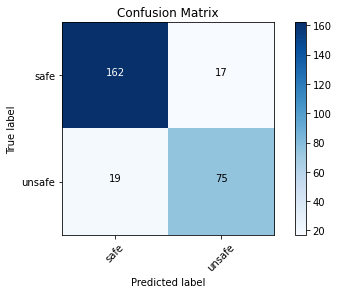

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')